## GPS Data

In [58]:
import requests, zipfile, io, gzip, glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [ ]:
P734_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/P734_e.csv')
CABL_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/CABL_e.csv')
LWCK_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/LWCK_e.csv')
ONAB_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/ONAB_e.csv')

In [ ]:
P734_e_filtered = P734_e[(P734_e['T'] > 2012) & (P734_e['T'] < 2014)]
CABL_e_filtered = CABL_e[(CABL_e['T'] > 2012) & (CABL_e['T'] < 2014)]
LWCK_e_filtered = LWCK_e[(LWCK_e['T'] > 2012) & (LWCK_e['T'] < 2014)]
ONAB_e_filtered = ONAB_e[(ONAB_e['T'] > 2012) & (ONAB_e['T'] < 2014)]

## NOAA Data

In [ ]:
Crescent_City_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Crescent_City_prec.csv')
Port_Orford_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Port_Orford_prec.csv')
South_Beach_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/South_Beach_prec.csv')
Astoria_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Astoria_prec.csv')

In [ ]:
Crescent_City_msl_filtered = Crescent_City_msl[(Crescent_City_msl['Time'] >2012 & (Crescent_City_msl['Time'] < 2014))]
Port_Orford_msl_filtered = Port_Orford_msl[(Port_Orford_msl['Time'] >2012 & (Port_Orford_msl['Time'] < 2014))]
South_Beach_msl_filtered = South_Beach_msl[(South_Beach_msl['Time'] >2012 & (South_Beach_msl['Time'] < 2014))]
Astoria_msl_filtered = Astoria_msl[(Astoria_msl['Time'] >2012 & (Astoria_msl['Time'] < 2014))]

In [ ]:
# Plot the graph
fig,ax=plt.subplots(4,1,figsize=(11,8),sharex=True)
fig.suptitle('Curated GPS Stations in East motion [mm]')
ax[0].plot(P734_e_filtered['T'],P734_e_filtered['RESIDUALS']);ax[0].grid(True);ax[0].set_ylabel('P734')
ax[1].plot(CABL_e_filtered['T'],CABL_e_filtered['RESIDUALS']);ax[1].grid(True);ax[1].set_ylabel('CABL')
ax[2].plot(LWCK_e_filtered['T'],LWCK_e_filtered['RESIDUALS']);ax[2].grid(True);ax[2].set_ylabel('LWCK')
ax[3].plot(ONAB_e_filtered['T'],ONAB_e_filtered['RESIDUALS']);ax[3].grid(True);ax[3].set_ylabel('ONAB')
ax[3].set_xlabel('Time (years)')
# Set X-axis limit from 2012 to 2014
for a in ax:
    a.set_xlim(2012, 2014)
plt.show()

In [ ]:
# Plot the graph
fig,ax=plt.subplots(4,1,figsize=(11,8),sharex=True)
fig.suptitle('Curated NOAA Stations for MSL')
ax[0].plot(Crescent_City_msl_filtered['Time'],Crescent_City_msl_filtered[' Monthly_MSL'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Crescent City')
ax[1].plot(Port_Orford_msl_filtered['Time'],Port_Orford_msl_filtered[' Monthly_MSL'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Port Orford')
ax[2].plot(South_Beach_msl_filtered['Time'],South_Beach_msl_filtered[' Monthly_MSL'], '-.r');ax[2].grid(True);ax[2].set_ylabel('South Beach')
ax[3].plot(Astoria_msl_filtered['Time'],Astoria_msl_filtered[' Monthly_MSL'], '-.r');ax[3].grid(True);ax[3].set_ylabel('Astoria')
ax[3].set_xlabel('Time (years)')
# Set X-axis limit from 2012 to 2014
for a in ax:
    a.set_xlim(2012, 2014)
plt.show()

## GPS and NOAA stations

In [ ]:
GPS = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_station.csv')
NOAA = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_station.csv')

In [ ]:
GPS

In [ ]:
GPS_curated = GPS.loc[(GPS.Station == 'P734') | (GPS.Station == 'CABL') | (GPS.Station == 'ONAB') | (GPS.Station == 'LWCK') ]

In [ ]:
GPS_curated

In [ ]:
NOAA

In [ ]:
fig = px.scatter_geo(NOAA,
                     lat='Lat',lon='Long', 
                     height=600, width=600,
                     hover_name='Name',
                     hover_data=['State','ID']);
fig.update_geos(resolution=110, showcountries=True,showland=True,showcoastlines=True,
               lonaxis=dict(range=[-130, -115], gridwidth=1, dtick=2, showgrid=True),
               lataxis=dict(range=[32, 50], gridwidth=1, dtick=2, showgrid=True))

In [ ]:
from itertools import chain

def draw_map (m, scale=0.2):
    #draw a shaded-relief image
    m.shadedrelief(scale=scale)

    #lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    #keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    #cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='black')

In [ ]:
# Clean 'Long' column in NOAA and GPS dataset
NOAA['Long'] = NOAA['Long'].replace('\u200b\u200b', '', regex=True)
NOAA['Long'] = pd.to_numeric(NOAA['Long'], errors='coerce')

GPS['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')

GPS_curated['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS_curated['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')


# Drop rows with NaN values in Long or Lat
NOAA = NOAA.dropna(subset=['Long', 'Lat']) 
GPS = GPS.dropna(subset=['Long', 'Lat'])
GPS_curated = GPS_curated.dropna(subset=['Long', 'Lat'])

# Extract latitude and longitude
Lat_NOAA = NOAA['Lat']
Long_NOAA = NOAA['Long']
Lat_GPS = GPS['Lat']
Long_GPS = GPS['Long']
Lat_GPS_curated = GPS_curated['Lat']
Long_GPS_curated = GPS_curated['Long']
Name_NOAA = NOAA['Name']
Name_GPS = GPS['Station']
Name_GPS_curated = GPS_curated['Station']

fig = plt.figure(figsize = (12, 12))
m = Basemap(projection= 'lcc', resolution = None, 
            width = 1.8E6, height = 1.8E6,
            lat_0 = 42, lon_0 = -125)

#draw_map(m)

# Specify the correct path to the shapefile (replace 'path_to_directory' with the correct path)
shapefile_path = '/Users/suphakornpoobua/Documents/GitHub/Undergraduate-Research-2/'

# Add state boundaries
m.readshapefile(shapefile_path + 'st99_d00', name='states', drawbounds=True)

m.etopo(scale=1, alpha=0.5)

# Map (Long, Lat) to (x, y) for plotting all points at once
X, Y = m(Long_NOAA.values, Lat_NOAA.values)
#A, B = m(Long_GPS.values, Lat_GPS.values)
A, B = m(Long_GPS_curated.values, Lat_GPS_curated.values)

# Plot all points at once
plt.plot(X, Y, '^', markersize=5, color='red', label='NOAA Stations')
plt.plot(A, B, 's', markersize=5, color='blue', label='GPS Stations')

# Add text labels for each point
for x, y, name1 in zip(X, Y, Name_NOAA):
    plt.text(x, y, name1, fontsize=6)

# Add text labels for each point
for a, b, name2 in zip(A, B, Name_GPS):
    plt.text(a, b, name2, fontsize=6)   

plt.legend()
plt.show()

## Water Level Data

### Download data

In [92]:
#Northern Oregon (2008-2009) +- 2 years

#South Beach
South_Beach_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2006.csv')
South_Beach_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2007.csv')
South_Beach_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2008.csv')
South_Beach_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2009.csv')
South_Beach_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2010.csv')
South_Beach_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2011.csv')

#Garibaldi

Garibaldi_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2006.csv')
Garibaldi_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2007.csv')
Garibaldi_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2008.csv')
Garibaldi_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2009.csv')
Garibaldi_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2010.csv')
Garibaldi_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2011.csv')

#Astoria

Astoria_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2006.csv')
Astoria_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2007.csv')
Astoria_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2008.csv')
Astoria_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2009.csv')
Astoria_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2010.csv')
Astoria_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2011.csv')

#-----------------------------------------------#

#Southern Washington (2017-2018) +- 2 years

#Toke Point

Toke_Point_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2015.csv')
Toke_Point_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2016.csv')
Toke_Point_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2017.csv')
Toke_Point_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2018.csv')
Toke_Point_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2019.csv')
Toke_Point_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2020.csv')

#Westport

Westport_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2015.csv')
Westport_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2016.csv')
Westport_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2017.csv')
Westport_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2018.csv')
Westport_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2019.csv')
Westport_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2020.csv')

#Cape Disappointment

Cape_Disappointment_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2015.csv')
Cape_Disappointment_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2016.csv')
Cape_Disappointment_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2017.csv')
Cape_Disappointment_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2018.csv')
Cape_Disappointment_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2019.csv')
Cape_Disappointment_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2020.csv')

#-----------------------------------------------#

#Northern California (2017-2018) +- 2 years

#Crescent City

Crescent_City_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2015.csv')
Crescent_City_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2016.csv')
Crescent_City_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2017.csv')
Crescent_City_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2018.csv')
Crescent_City_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2019.csv')
Crescent_City_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2020.csv')

#North Spit

North_Spit_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2015.csv')
North_Spit_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2016.csv')
North_Spit_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2017.csv')
North_Spit_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2018.csv')
North_Spit_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2019.csv')
North_Spit_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2020.csv')

#Arena Cove 

Arena_Cove_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2015.csv')
Arena_Cove_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2016.csv')
Arena_Cove_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2017.csv')
Arena_Cove_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2018.csv')
Arena_Cove_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2019.csv')
Arena_Cove_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2020.csv')

#Point Reyes

Point_Reyes_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2015.csv')
Point_Reyes_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2016.csv')
Point_Reyes_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2017.csv')
Point_Reyes_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2018.csv')
Point_Reyes_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2019.csv')
Point_Reyes_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2020.csv')

#Monterey

Monterey_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2015.csv')
Monterey_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2016.csv')
Monterey_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2017.csv')
Monterey_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2018.csv')
Monterey_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2019.csv')
Monterey_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2020.csv')

In [106]:
#Concatenate the DataFrames

#Northern Oregon (2006-2011)
South_Beach_2006_2011 = pd.concat([South_Beach_2006, South_Beach_2007, South_Beach_2008, South_Beach_2009, South_Beach_2010, South_Beach_2011], ignore_index=True)
Garibaldi_2006_2011 = pd.concat([Garibaldi_2006, Garibaldi_2007, Garibaldi_2008, Garibaldi_2009, Garibaldi_2010, Garibaldi_2011], ignore_index=True)
Astoria_2006_2011 = pd.concat([Astoria_2006, Astoria_2007, Astoria_2008, Astoria_2009, Astoria_2010, Astoria_2011], ignore_index=True)

#Southern Washington (2015-2020)
Toke_Point_2015_2020 = pd.concat([Toke_Point_2017, Toke_Point_2018, Toke_Point_2019, Toke_Point_2020], ignore_index=True)
Westport_2015_2020 = pd.concat([Westport_2015, Westport_2016, Westport_2017, Westport_2018, Westport_2019, Westport_2020], ignore_index=True)
Cape_Disappointment_2015_2020 = pd.concat([Cape_Disappointment_2017, Cape_Disappointment_2018, Cape_Disappointment_2019, Cape_Disappointment_2020], ignore_index=True)

#Northern California (2015-2020)
Crescent_City_2015_2020 = pd.concat([Crescent_City_2015, Crescent_City_2016, Crescent_City_2017, Crescent_City_2018, Crescent_City_2019, Crescent_City_2020], ignore_index=True)
North_Spit_2015_2020 = pd.concat([North_Spit_2015, North_Spit_2016, North_Spit_2017, North_Spit_2018, North_Spit_2019, North_Spit_2020], ignore_index=True)
Arena_Cove_2015_2020 = pd.concat([Arena_Cove_2015, Arena_Cove_2016, Arena_Cove_2017, Arena_Cove_2018, Arena_Cove_2019, Arena_Cove_2020], ignore_index=True)
Point_Reyes_2015_2020 = pd.concat([Point_Reyes_2015, Point_Reyes_2016, Point_Reyes_2017, Point_Reyes_2018, Point_Reyes_2019, Point_Reyes_2020], ignore_index=True)
Monterey_2015_2020 = pd.concat([Monterey_2015, Monterey_2016, Monterey_2017, Monterey_2018, Monterey_2019, Monterey_2020], ignore_index=True)

In [91]:
#Remove rows containing NaN or '-' in the 'Verified (ft)' column
Toke_Point_2015_2020 = Toke_Point_2015_2020[(Toke_Point_2015_2020['Verified (ft)'].notna()) & (Toke_Point_2015_2020['Verified (ft)'] != '-')]
Cape_Disappointment_2015_2020 = Cape_Disappointment_2015_2020[(Cape_Disappointment_2015_2020['Verified (ft)'].notna()) & (Cape_Disappointment_2015_2020['Verified (ft)'] != '-')]

# Reset index after dropping rows
Toke_Point_2015_2020.reset_index(drop=True, inplace=True)
Cape_Disappointment_2015_2020.reset_index(drop=True, inplace=True)

#Can't plot Toke Point and Cape Disappointment

In [107]:
#Combine 'Date' and 'Time (GMT)' into a single column

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Date'] + ' ' + South_Beach_2006_2011['Time (GMT)'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Date'] + ' ' + Garibaldi_2006_2011['Time (GMT)'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Date'] + ' ' + Astoria_2006_2011['Time (GMT)'])

#Southern Washington (2015-2020)
Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Date'] + ' ' + Toke_Point_2015_2020['Time (GMT)'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Date'] + ' ' + Westport_2015_2020['Time (GMT)'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Date'] + ' ' + Cape_Disappointment_2015_2020['Time (GMT)'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Date'] + ' ' + Crescent_City_2015_2020['Time (GMT)'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Date'] + ' ' + North_Spit_2015_2020['Time (GMT)'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Date'] + ' ' + Arena_Cove_2015_2020['Time (GMT)'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Date'] + ' ' + Point_Reyes_2015_2020['Time (GMT)'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Date'] + ' ' + Monterey_2015_2020['Time (GMT)'])

### Visualize raw data

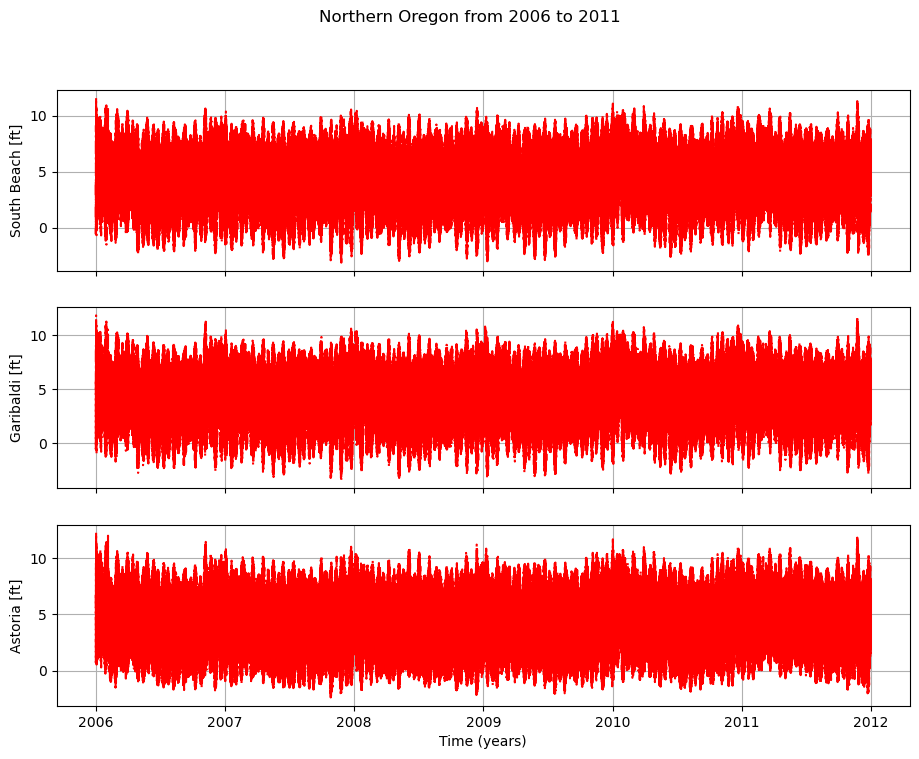

In [95]:
#Northern Oregon (2006-2011)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern Oregon from 2006 to 2011')
ax[0].plot(South_Beach_2006_2011['Datetime'], South_Beach_2006_2011['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('South Beach [ft]') 
ax[1].plot(Garibaldi_2006_2011['Datetime'], Garibaldi_2006_2011['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Garibaldi [ft]') 
ax[2].plot(Astoria_2006_2011['Datetime'], Astoria_2006_2011['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Astoria [ft]') 
ax[2].set_xlabel('Time (years)')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

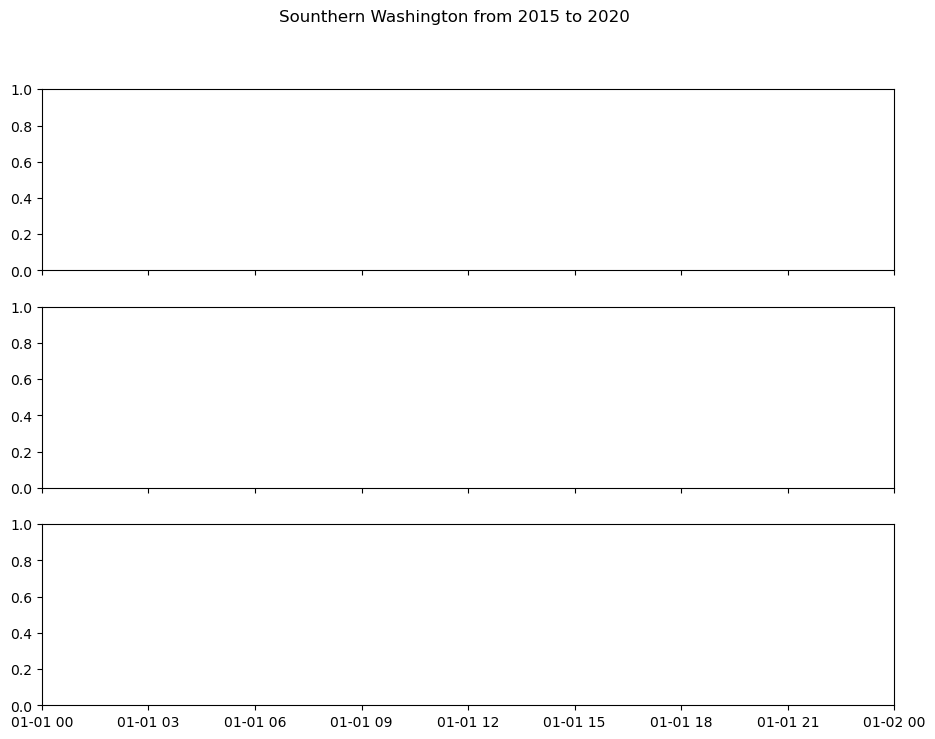

In [84]:
#Southern Washington (2015-2020)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Sounthern Washington from 2015 to 2020')
ax[0].plot(Toke_Point_2015_2020['Datetime'], Toke_Point_2015_2020['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Toke Point [ft]') 
ax[1].plot(Westport_2015_2020['Datetime'], Westport_2015_2020['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Westport [ft]') 
ax[2].plot(Cape_Disappointment_2015_2020['Datetime'], Cape_Disappointment_2015_2020['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Cape Disappointment [ft]') 
ax[2].set_xlabel('Time (years)')
plt.show()

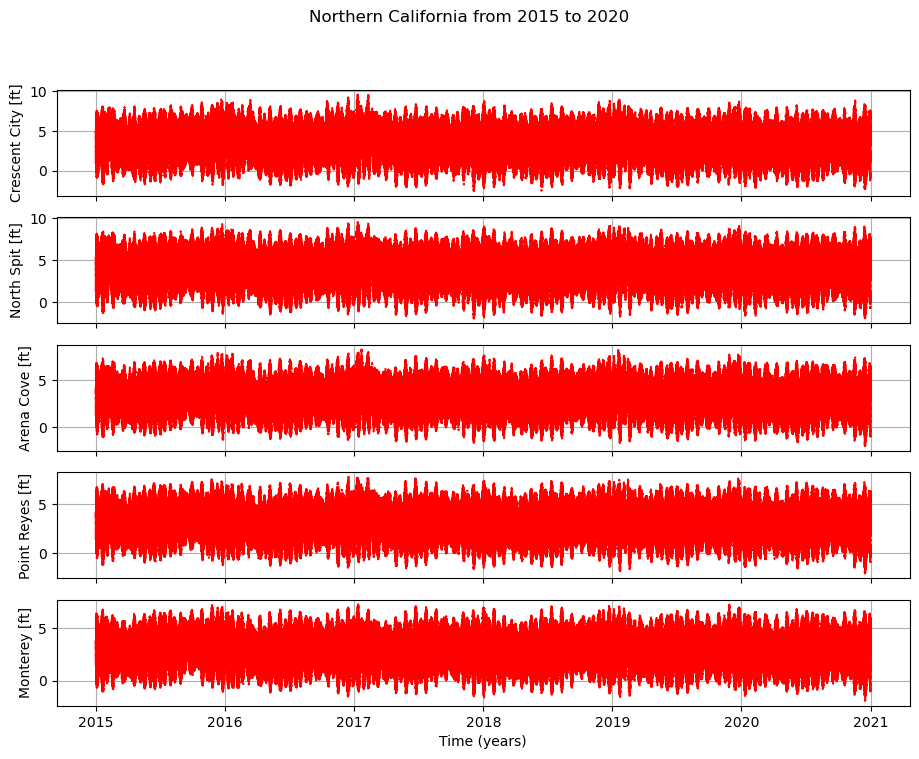

In [67]:
#Northern California (2015-2020)
fig,ax=plt.subplots(5,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern California from 2015 to 2020')
ax[0].plot(Crescent_City_2015_2020['Datetime'], Crescent_City_2015_2020['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Crescent City [ft]') 
ax[1].plot(North_Spit_2015_2020['Datetime'], North_Spit_2015_2020['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('North Spit [ft]') 
ax[2].plot(Arena_Cove_2015_2020['Datetime'], Arena_Cove_2015_2020['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Arena Cove [ft]')
ax[3].plot(Point_Reyes_2015_2020['Datetime'], Point_Reyes_2015_2020['Verified (ft)'], '-.r');ax[3].grid(True);ax[3].set_ylabel('Point Reyes [ft]')
ax[4].plot(Monterey_2015_2020['Datetime'], Monterey_2015_2020['Verified (ft)'], '-.r');ax[4].grid(True);ax[4].set_ylabel('Monterey [ft]') 
ax[4].set_xlabel('Time (years)')
plt.show()

In [112]:
#Combine 'Date' and 'Time (GMT)' into a single column

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Date'] + ' ' + South_Beach_2006_2011['Time (GMT)'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Date'] + ' ' + Garibaldi_2006_2011['Time (GMT)'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Date'] + ' ' + Astoria_2006_2011['Time (GMT)'])

#Southern Washington (2015-2020)
Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Date'] + ' ' + Toke_Point_2015_2020['Time (GMT)'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Date'] + ' ' + Westport_2015_2020['Time (GMT)'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Date'] + ' ' + Cape_Disappointment_2015_2020['Time (GMT)'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Date'] + ' ' + Crescent_City_2015_2020['Time (GMT)'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Date'] + ' ' + North_Spit_2015_2020['Time (GMT)'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Date'] + ' ' + Arena_Cove_2015_2020['Time (GMT)'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Date'] + ' ' + Point_Reyes_2015_2020['Time (GMT)'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Date'] + ' ' + Monterey_2015_2020['Time (GMT)'])

#-----------------------------------------------#

#Convert 'Datetime' column to datetime

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Datetime'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Datetime'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Datetime'])

#Southern Washington (2015-2020)
Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Datetime'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Datetime'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Datetime'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Datetime'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Datetime'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Datetime'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Datetime'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Datetime'])

#-----------------------------------------------#

#Set 'Datetime' column as the index

#Northern Oregon (2006-2011)
South_Beach_2006_2011.set_index('Datetime', inplace=True)
Garibaldi_2006_2011.set_index('Datetime', inplace=True)
Astoria_2006_2011.set_index('Datetime', inplace=True)

#Southern Washington (2015-2020)
Toke_Point_2015_2020.set_index('Datetime', inplace=True)
Westport_2015_2020.set_index('Datetime', inplace=True)
Cape_Disappointment_2015_2020.set_index('Datetime', inplace=True)

#Northern California (2015-2020)
Crescent_City_2015_2020.set_index('Datetime', inplace=True)
North_Spit_2015_2020.set_index('Datetime', inplace=True)
Arena_Cove_2015_2020.set_index('Datetime', inplace=True)
Point_Reyes_2015_2020.set_index('Datetime', inplace=True)
Monterey_2015_2020.set_index('Datetime', inplace=True)

#Resample by averaging every 24 values

#Northern Oregon (2006-2011)
South_Beach_2006_2011_resampled = South_Beach_2006_2011.resample('24H').mean()
Garibaldi_2006_2011_resampled = Garibaldi_2006_2011.resample('24H').mean()
Astoria_2006_2011_resampled = Astoria_2006_2011.resample('24H').mean()

#Southern Washington (2015-2020)
Toke_Point_2015_2020_resampled = Toke_Point_2015_2020.resample('24H').mean()
Westport_2015_2020_resampled = Westport_2015_2020.resample('24H').mean()
Cape_Disappointment_2015_2020_resampled = Cape_Disappointment_2015_2020.resample('24H').mean()

#Northern California (2015-2020)
Crescent_City_2015_2020_resampled = Crescent_City_2015_2020.resample('24H').mean()
North_Spit_2015_2020_resampled = North_Spit_2015_2020.resample('24H').mean()
Arena_Cove_2015_2020_resampled = Arena_Cove_2015_2020.resample('24H').mean()
Point_Reyes_2015_2020_resampled = Point_Reyes_2015_2020.resample('24H').mean()
Monterey_2015_2020_resampled = Monterey_2015_2020.resample('24H').mean()

/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_4984/3721584738.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  South_Beach_2006_2011_resampled = South_Beach_2006_2011.resample('24H').mean()
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_4984/3721584738.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Garibaldi_2006_2011_resampled = Garibaldi_2006_2011.resample('24H').mean()
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_4984/3721584738.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

### Visualize resampled data

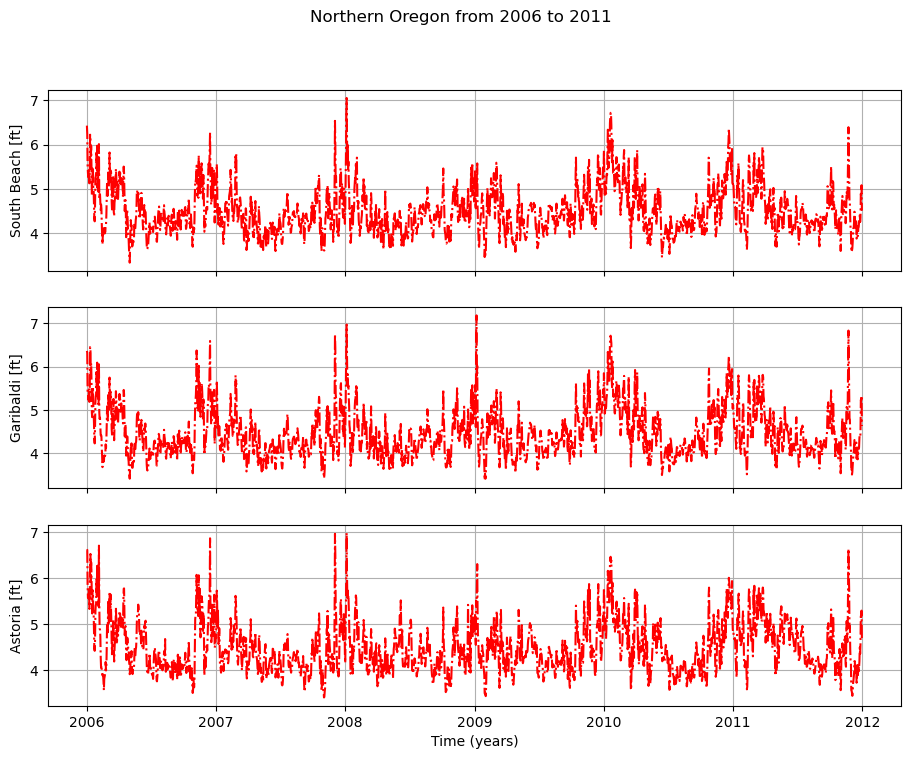

In [76]:
#Northern Oregon (2006-2011)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern Oregon from 2006 to 2011')
ax[0].plot(South_Beach_2006_2011_resampled.index, South_Beach_2006_2011_resampled['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('South Beach [ft]')
ax[1].plot(Garibaldi_2006_2011_resampled.index, Garibaldi_2006_2011_resampled['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Garibaldi [ft]')
ax[2].plot(Astoria_2006_2011_resampled.index, Astoria_2006_2011_resampled['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Astoria [ft]')
ax[2].set_xlabel('Time (years)')
plt.show()

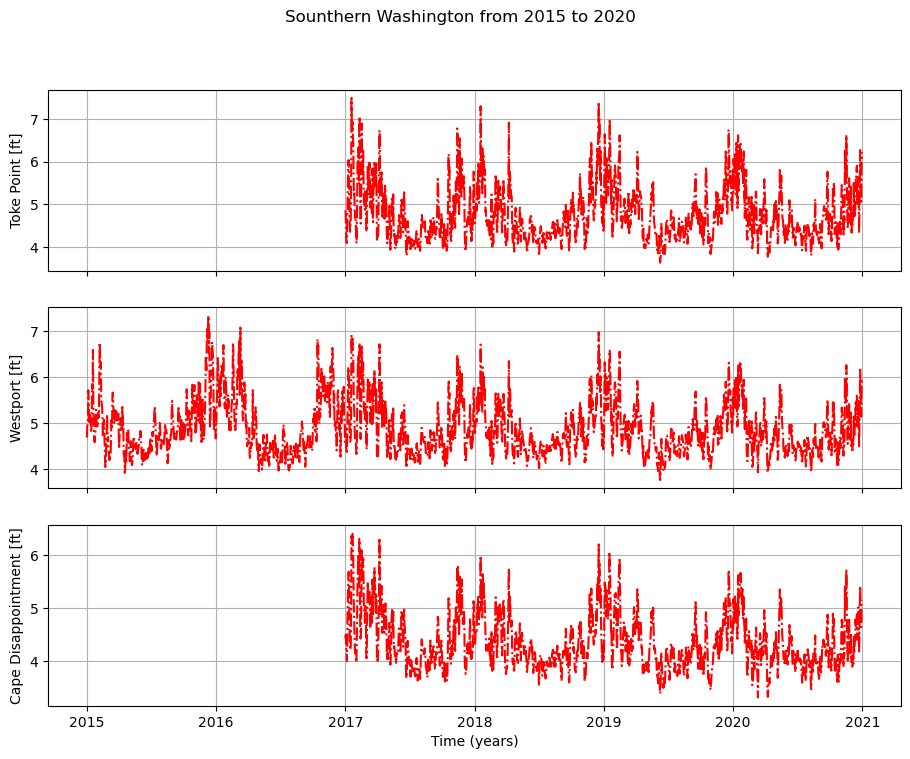

In [114]:
#Southern Washington (2015-2020)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Sounthern Washington from 2015 to 2020')
ax[0].plot(Toke_Point_2015_2020_resampled.index, Toke_Point_2015_2020_resampled['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Toke Point [ft]') #;ax[0].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[1].plot(Westport_2015_2020_resampled.index, Westport_2015_2020_resampled['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Westport [ft]') #;ax[1].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[2].plot(Cape_Disappointment_2015_2020_resampled.index, Cape_Disappointment_2015_2020_resampled['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Cape Disappointment [ft]') #;ax[2].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[2].set_xlabel('Time (years)')
plt.show()

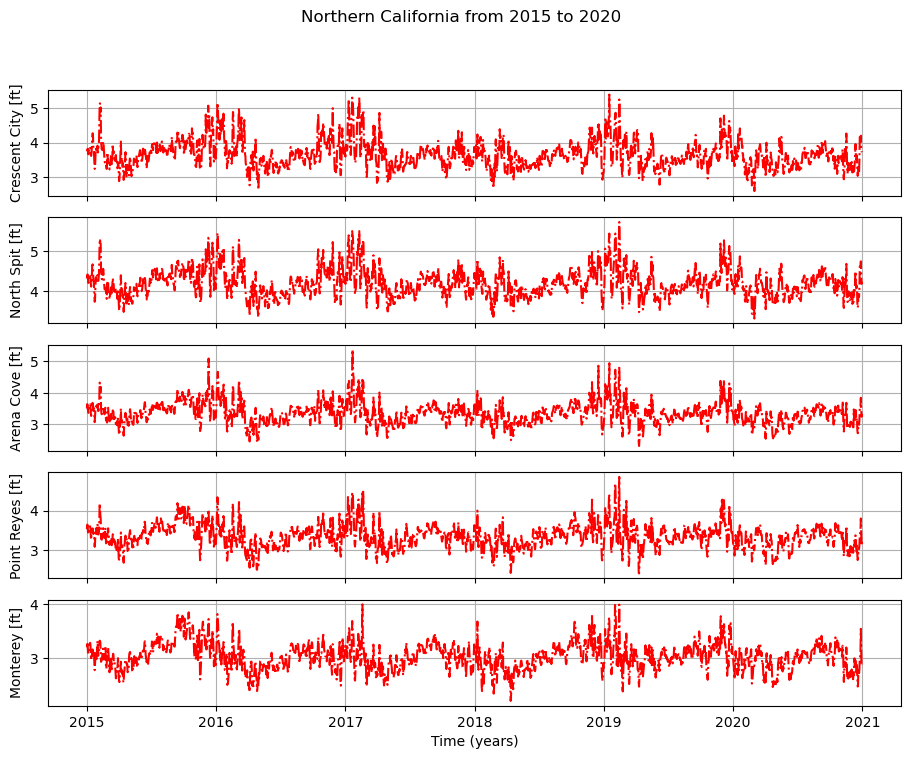

In [78]:
#Northern California (2015-2020)
fig,ax=plt.subplots(5,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern California from 2015 to 2020')
ax[0].plot(Crescent_City_2015_2020_resampled.index, Crescent_City_2015_2020_resampled['Verified (ft)'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Crescent City [ft]') #;ax[0].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[1].plot(North_Spit_2015_2020_resampled.index, North_Spit_2015_2020_resampled['Verified (ft)'], '-.r');ax[1].grid(True);ax[1].set_ylabel('North Spit [ft]') #;ax[1].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[2].plot(Arena_Cove_2015_2020_resampled.index, Arena_Cove_2015_2020_resampled['Verified (ft)'], '-.r');ax[2].grid(True);ax[2].set_ylabel('Arena Cove [ft]') #;ax[2].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[3].plot(Point_Reyes_2015_2020_resampled.index, Point_Reyes_2015_2020_resampled['Verified (ft)'], '-.r');ax[3].grid(True);ax[3].set_ylabel('Point Reyes [ft]') #;ax[3].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[4].plot(Monterey_2015_2020_resampled.index, Monterey_2015_2020_resampled['Verified (ft)'], '-.r');ax[4].grid(True);ax[4].set_ylabel('Monterey [ft]') #;ax[4].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[4].set_xlabel('Time (years)')
plt.show()